# CAPSTONE UAS Bengkel Koding DS-06

- Nama: Muhammad Rendy Ramadhan
- Nim: A11.2022.14590
- Kelas: DS-06

#1. Exploratory Data Analysis (EDA)
- Menampilkan beberapa baris pertama dan informasi umum dataset seperti jumlah
baris, kolom, deskripsi data dan tipe data.
- Menampilkan visualisasi data.
- Mengecek keberadaan missing values, unique value, data duplikat, keseimbangan
data, dan deteksi outlier menggunakan boxplot dan menanganinya.
- Membuat kesimpulan dari proses yang dilakukan pada tahap ini.

In [499]:
#import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [500]:
#membaca dataset
df = pd.read_csv('ObesityDataSet.csv', sep=',', skipinitialspace=True, na_values="?")

In [501]:
#menampilkan data
df.head()

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21.0,Female,1.62,64.0,no,no,2.0,3.0,no,no,2.0,yes,0.0,1.0,Sometimes,Public_Transportation,Normal_Weight
1,21.0,Female,1.52,56.0,Sometimes,no,3.0,3.0,yes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,23.0,Male,1.80,77.0,Frequently,no,2.0,3.0,no,no,2.0,yes,2.0,1.0,Sometimes,Public_Transportation,Normal_Weight
3,27.0,Male,1.80,87.0,Frequently,no,3.0,3.0,no,no,2.0,no,2.0,0.0,Sometimes,Walking,Overweight_Level_I
4,22.0,Male,1.78,89.8,Sometimes,no,2.0,1.0,no,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [502]:
#menampilkan info data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             2089 non-null   float64
 1   Gender                          2089 non-null   object 
 2   Height                          2089 non-null   float64
 3   Weight                          2092 non-null   float64
 4   CALC                            2091 non-null   object 
 5   FAVC                            2089 non-null   object 
 6   FCVC                            2093 non-null   float64
 7   NCP                             2089 non-null   float64
 8   SCC                             2093 non-null   object 
 9   SMOKE                           2098 non-null   object 
 10  CH2O                            2096 non-null   float64
 11  family_history_with_overweight  2088 non-null   object 
 12  FAF                             20

In [503]:
# Cek missing values
print("Missing values sebelum pembersihan:")
print(df.isnull().sum())

Missing values sebelum pembersihan:
Age                               22
Gender                            22
Height                            22
Weight                            19
CALC                              20
FAVC                              22
FCVC                              18
NCP                               22
SCC                               18
SMOKE                             13
CH2O                              15
family_history_with_overweight    23
FAF                               19
TUE                               15
CAEC                              18
MTRANS                            12
NObeyesdad                         0
dtype: int64


In [504]:
# Ubah tipe data numerik
numeric_cols = ['Age', 'Height', 'Weight', 'NCP', 'CH2O', 'FAF', 'TUE']
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

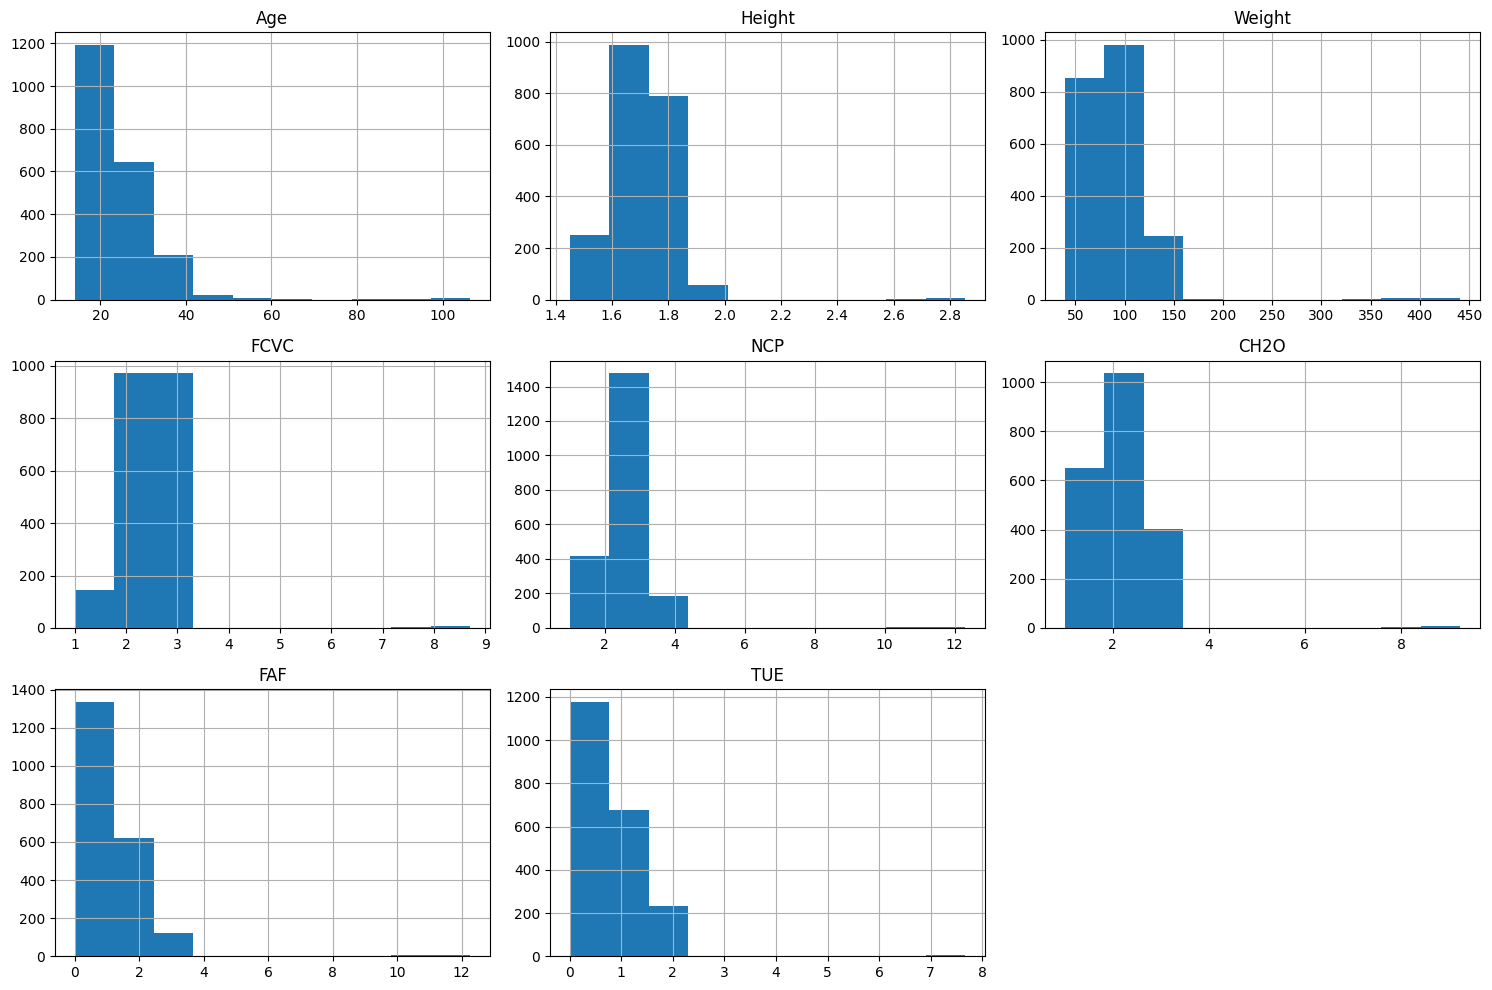

In [505]:
# Visualisasi data numerik dengan histogram
numeric_features = df.select_dtypes(include=[np.number]).columns
df[numeric_features].hist(figsize=(15, 10))
plt.tight_layout()
plt.show()

In [506]:
# Tampilkan tipe data setiap kolom
print(df.dtypes)

# Memeriksa nilai non-numerik
numeric_columns = df.select_dtypes(include=[np.number]).columns
for col in numeric_columns:
    non_numeric = df[pd.to_numeric(df[col], errors='coerce').isna()]
    if len(non_numeric) > 0:
        print(f"\nNilai non-numerik dalam kolom {col}:")
        print(non_numeric[col].unique())

Age                               float64
Gender                             object
Height                            float64
Weight                            float64
CALC                               object
FAVC                               object
FCVC                              float64
NCP                               float64
SCC                                object
SMOKE                              object
CH2O                              float64
family_history_with_overweight     object
FAF                               float64
TUE                               float64
CAEC                               object
MTRANS                             object
NObeyesdad                         object
dtype: object

Nilai non-numerik dalam kolom Age:
[nan]

Nilai non-numerik dalam kolom Height:
[nan]

Nilai non-numerik dalam kolom Weight:
[nan]

Nilai non-numerik dalam kolom FCVC:
[nan]

Nilai non-numerik dalam kolom NCP:
[nan]

Nilai non-numerik dalam kolom CH2O:
[nan]

Nilai non-n

In [507]:
# Periksa range nilai untuk kolom numerik
for col in numeric_columns:
    print(f"\nRange nilai untuk {col}:")
    print(f"Min: {df[col].min()}, Max: {df[col].max()}")

# Periksa kategori unik untuk kolom kategorikal
categorical_columns = df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    print(f"\nKategori unik dalam {col}:")
    print(df[col].unique())


Range nilai untuk Age:
Min: 14.0, Max: 106.4412521246347

Range nilai untuk Height:
Min: 1.45, Max: 2.853986075232335

Range nilai untuk Weight:
Min: 39.0, Max: 441.1310776586406

Range nilai untuk FCVC:
Min: 1.0, Max: 8.706794695591519

Range nilai untuk NCP:
Min: 1.0, Max: 12.299828447218044

Range nilai untuk CH2O:
Min: 1.0, Max: 9.23329438001147

Range nilai untuk FAF:
Min: 0.0, Max: 12.270274762078117

Range nilai untuk TUE:
Min: 0.0, Max: 7.669504206178693

Kategori unik dalam Gender:
['Female' 'Male' nan]

Kategori unik dalam CALC:
['no' 'Sometimes' 'Frequently' nan 'Always']

Kategori unik dalam FAVC:
['no' 'yes' nan]

Kategori unik dalam SCC:
['no' 'yes' nan]

Kategori unik dalam SMOKE:
['no' 'yes' nan]

Kategori unik dalam family_history_with_overweight:
['yes' 'no' nan]

Kategori unik dalam CAEC:
['Sometimes' 'Frequently' 'Always' 'no' nan]

Kategori unik dalam MTRANS:
['Public_Transportation' 'Walking' 'Automobile' 'Motorbike' 'Bike' nan]

Kategori unik dalam NObeyesdad:
[

In [508]:
# Cek duplikat
duplicate_count = df.duplicated().sum()
print(f"Jumlah baris duplikat: {duplicate_count}")

Jumlah baris duplikat: 18


In [509]:
# Distribusi target variable
df['NObeyesdad'].value_counts(normalize=True)

,proportion
NObeyesdad,
Obesity_Type_I,0.166272
Obesity_Type_III,0.153482
Obesity_Type_II,0.140692
Overweight_Level_I,0.137376
Overweight_Level_II,0.137376
Normal_Weight,0.135955
Insufficient_Weight,0.128849


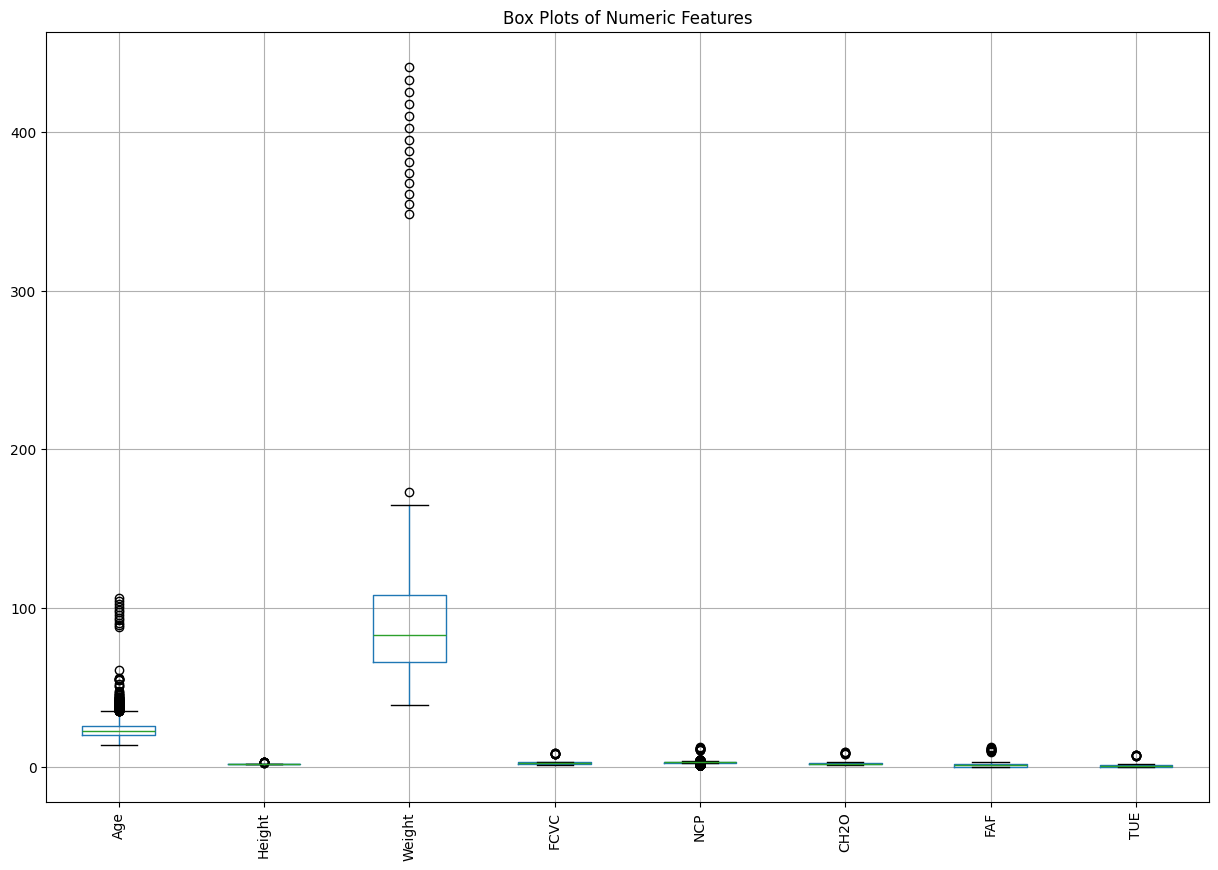

In [510]:
# Box plot untuk mendeteksi outlier pada variabel numerik
plt.figure(figsize=(15, 10))
df[numeric_features].boxplot()
plt.title('Box Plots of Numeric Features')
plt.xticks(rotation=90)
plt.show()

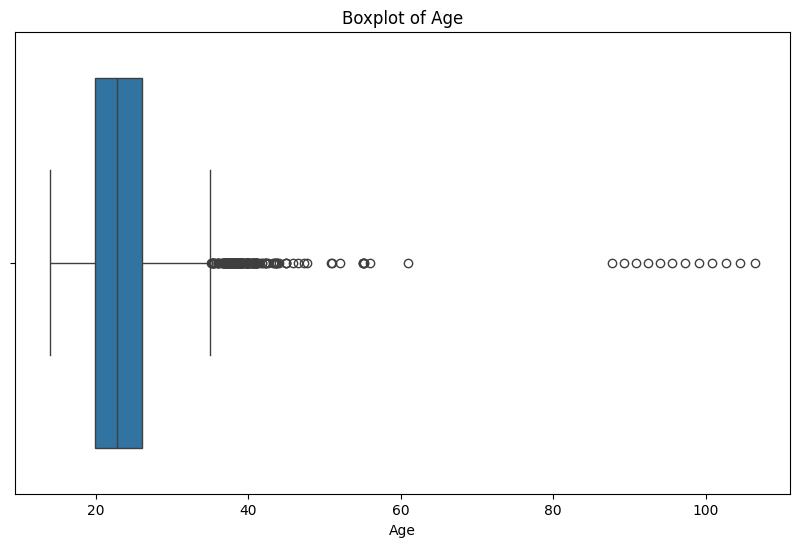

Outliers pada Age sudah dihandel.


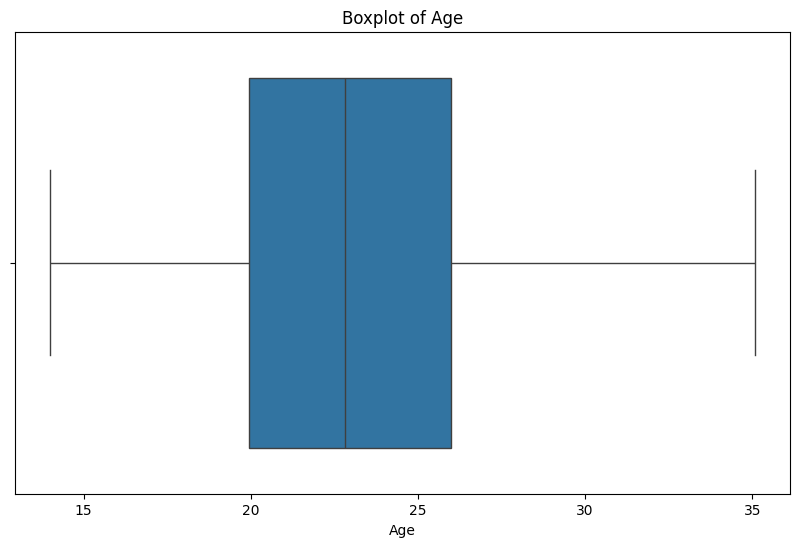

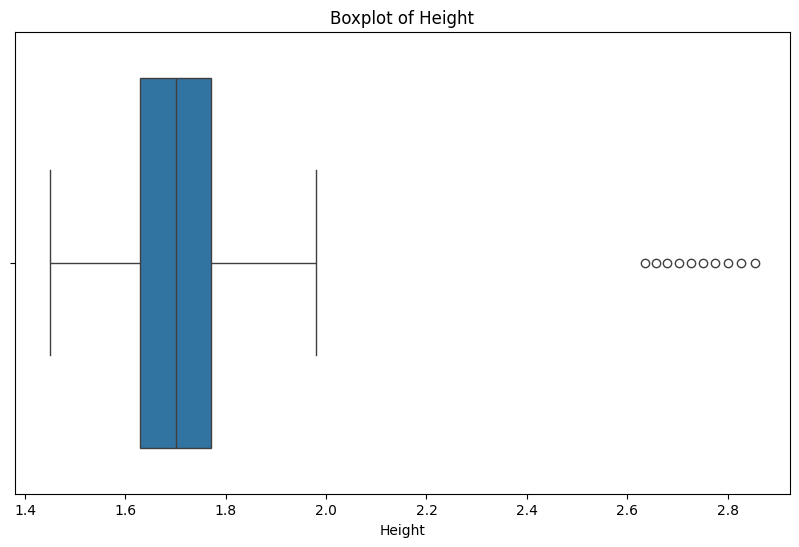

Outliers pada Height sudah dihandel.


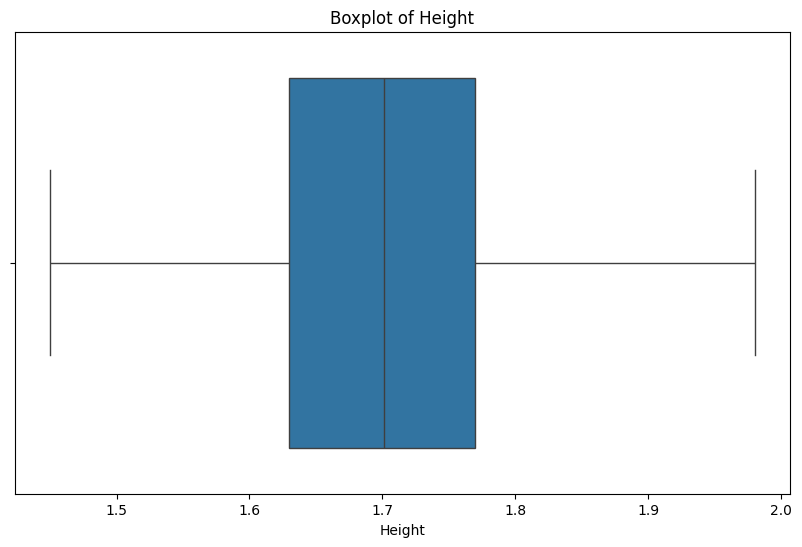

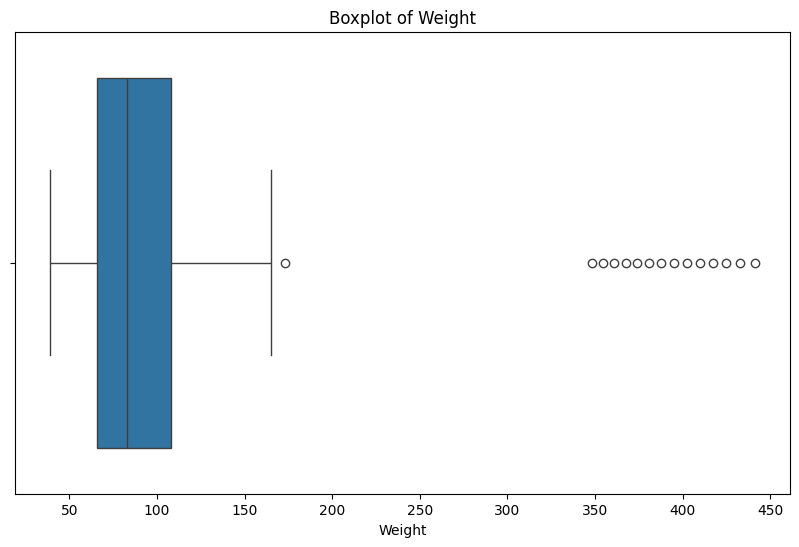

Outliers pada Weight sudah dihandel.


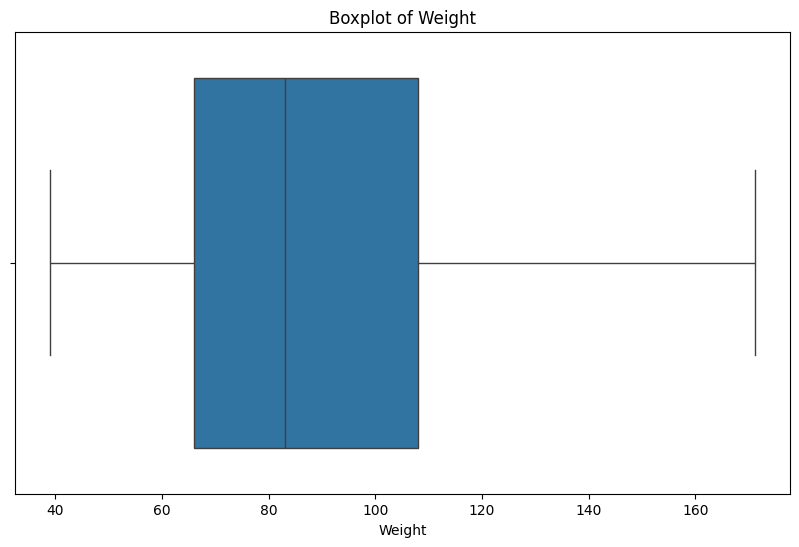

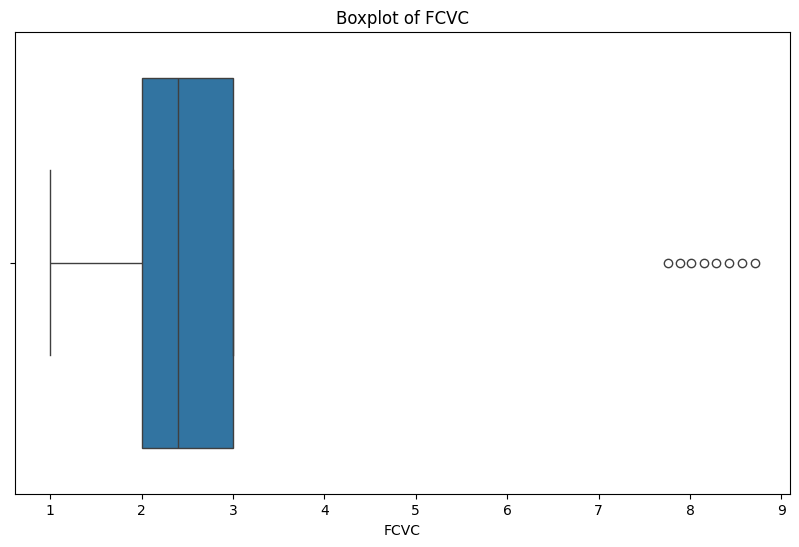

Outliers pada FCVC sudah dihandel.


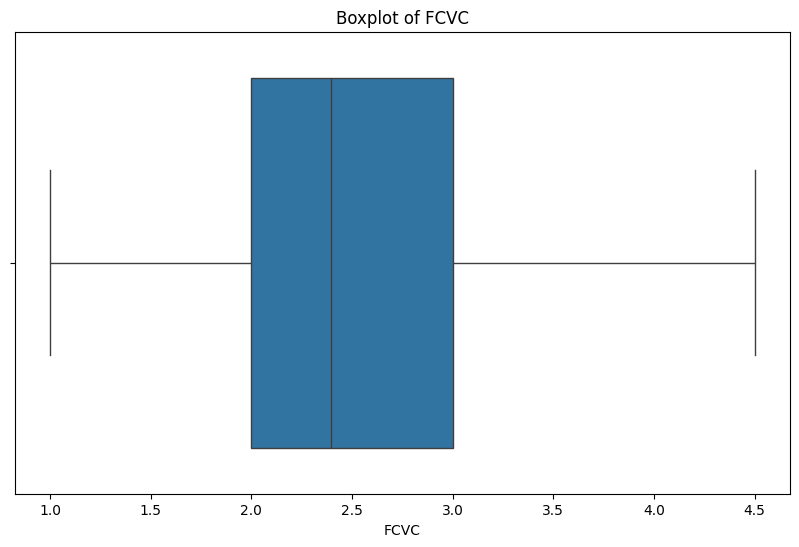

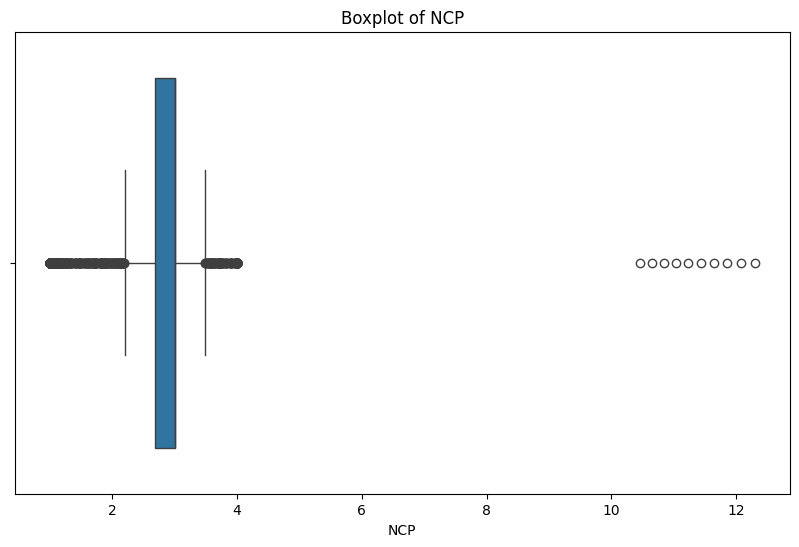

Outliers pada NCP sudah dihandel.


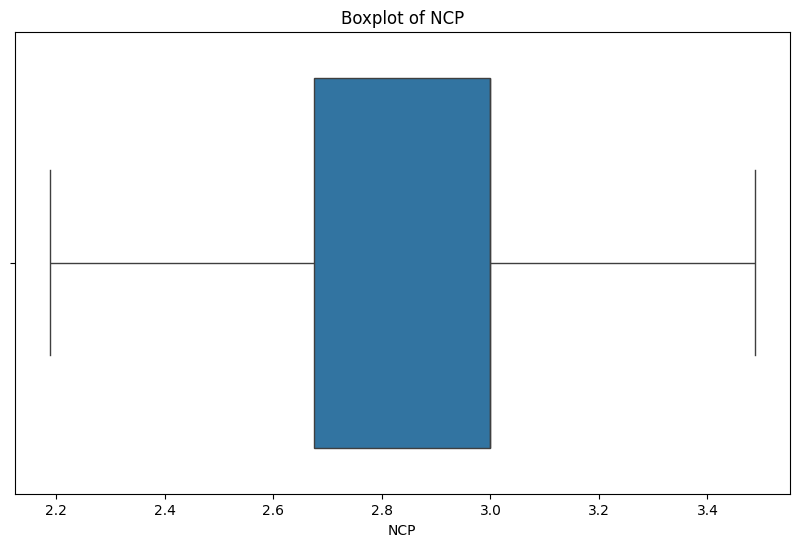

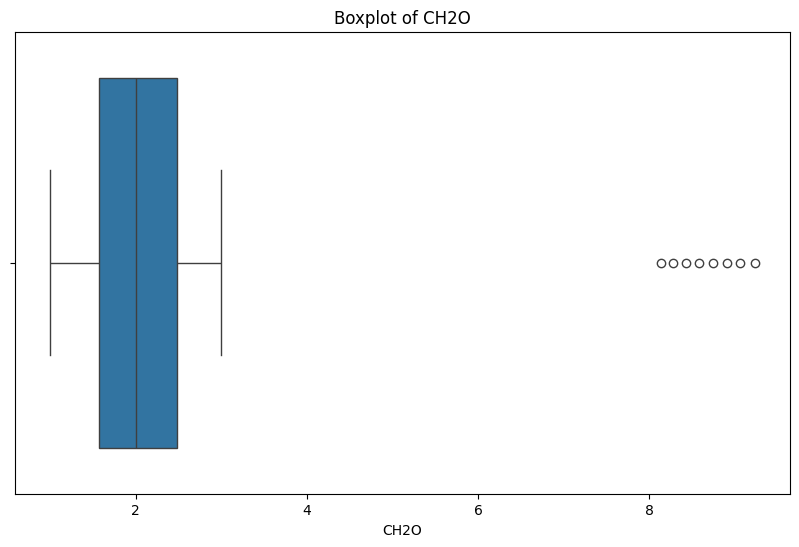

Outliers pada CH2O sudah dihandel.


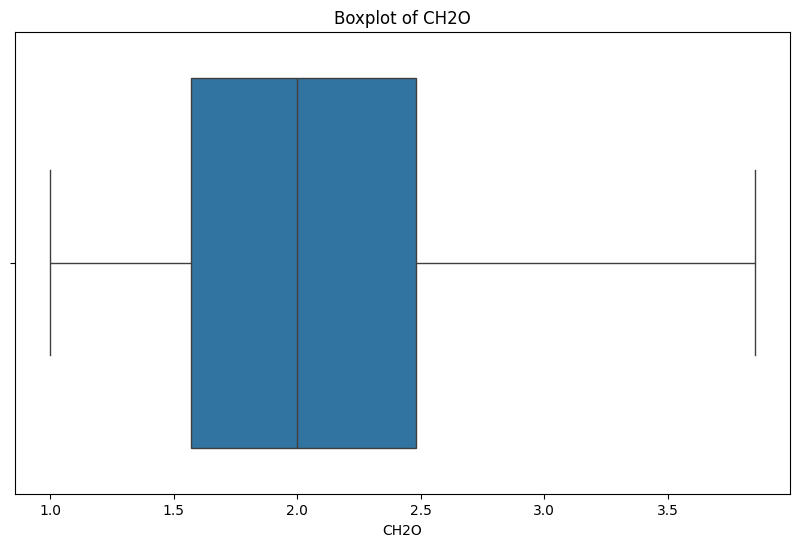

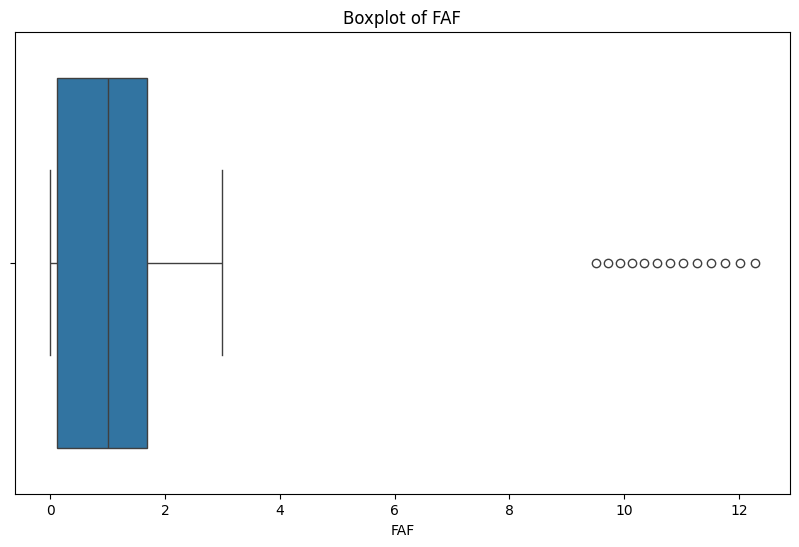

Outliers pada FAF sudah dihandel.


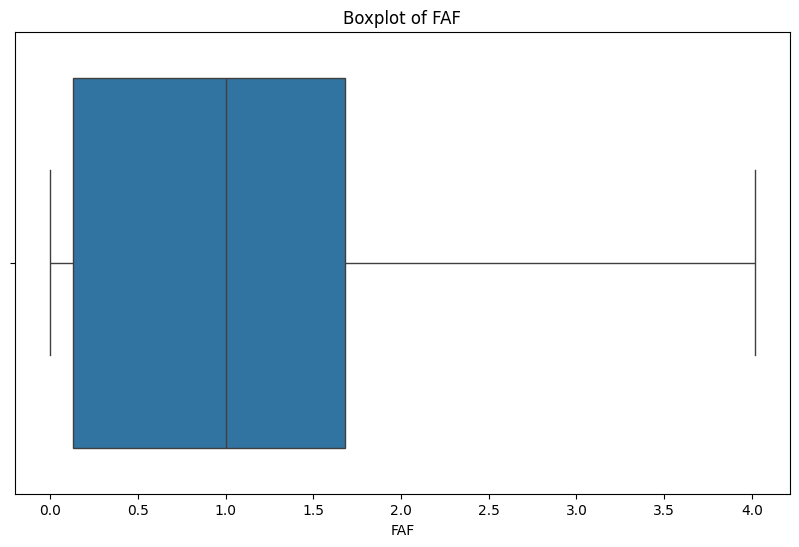

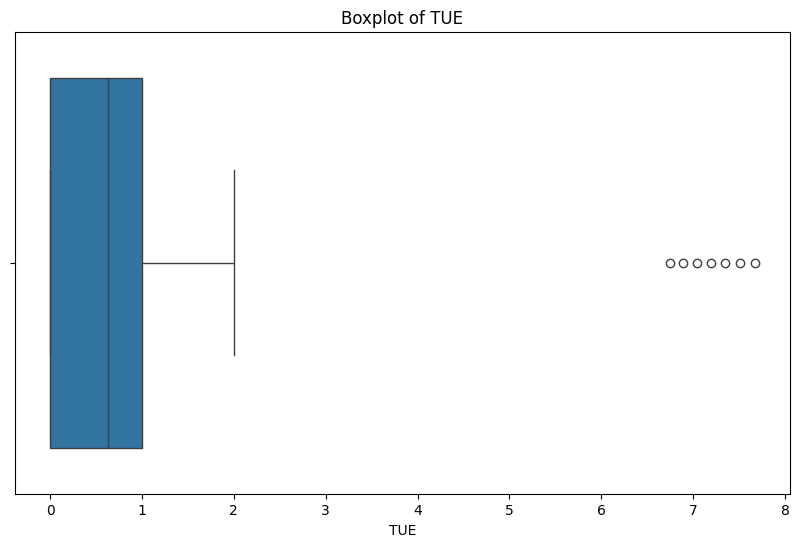

Outliers pada TUE sudah dihandel.


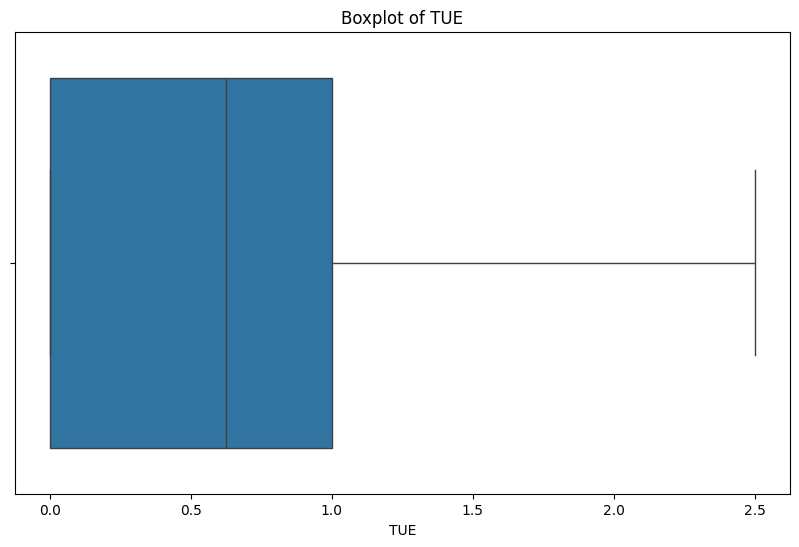

In [511]:
#menangani outlier

def plot_boxplot(df, column):
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot of {column}')
    plt.show()

# Contoh untuk kolom numerik
numeric_columns = df.select_dtypes(include=[np.number]).columns

for column in numeric_columns:
    plot_boxplot(df, column)

    # Menangani outlier dengan IQR method
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df[column] = np.where(df[column] > upper_bound, upper_bound,
                          np.where(df[column] < lower_bound, lower_bound, df[column]))

    print(f"Outliers pada {column} sudah dihandel.")
    plot_boxplot(df, column)

Kesimpulan:
1. .....
2. .....
3. .....

#2. Preprocessing Data
- Menangani missing values, error, duplikasi, dan outlier (sudah ditangani) di setiap kolom.
- Mengubah data kategori menjadi numerik.
- Menentukan apakah semua feature perlu digunakan.
- Mengatasi ketidakseimbangan kelas data.
- Melakukan normalisasi atau standarisasi data.
- Membuat kesimpulan dari proses yang dilakukan pada tahap ini.

In [512]:
# Menangani missing values
for column in df.columns:
    if df[column].dtype == 'object':
        # Untuk kolom kategorikal, isi dengan modus
        df[column].fillna(df[column].mode()[0], inplace=True)
    else:
        # Untuk kolom numerik, isi dengan median
        df[column].fillna(df[column].median(), inplace=True)

print("\nMissing values setelah pembersihan:")
print(df.isnull().sum())


Missing values setelah pembersihan:
Age                               0
Gender                            0
Height                            0
Weight                            0
CALC                              0
FAVC                              0
FCVC                              0
NCP                               0
SCC                               0
SMOKE                             0
CH2O                              0
family_history_with_overweight    0
FAF                               0
TUE                               0
CAEC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64


<ipython-input-512-c9f7d664130e>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].median(), inplace=True)
<ipython-input-512-c9f7d664130e>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', tr

In [513]:
# menghapus duplikat
df.drop_duplicates(inplace=True)

print(f"Jumlah baris setelah menghapus duplikat: {len(df)}")

Jumlah baris setelah menghapus duplikat: 2090


In [514]:
# mengubah kategori ke numerik
from sklearn.preprocessing import LabelEncoder

# Label Encoding untuk kolom target (NObeyesdad)
label_encoder = LabelEncoder()
df['NObeyesdad'] = label_encoder.fit_transform(df['NObeyesdad'])

# One-Hot Encoding untuk kolom kategorikal lainnya
categorical_columns = ['Gender', 'family_history_with_overweight', 'FAVC', 'FCVC', 'CAEC',
                       'SMOKE', 'SCC', 'TUE', 'CALC', 'MTRANS']

df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

# Menampilkan hasil perubahan
df.head()

,Age,Height,Weight,NCP,CH2O,FAF,NObeyesdad,Gender_Male,family_history_with_overweight_yes,FAVC_yes,...,TUE_1.99219,TUE_2.0,TUE_2.5,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,21.0,1.62,64.0,3.000000,2.0,0.0,1,False,True,False,...,False,False,False,False,False,True,False,False,True,False
1,21.0,1.52,56.0,3.000000,3.0,3.0,1,False,True,False,...,False,False,False,False,True,False,False,False,True,False
2,23.0,1.80,77.0,3.000000,2.0,2.0,1,True,True,False,...,False,False,False,True,False,False,False,False,True,False
3,27.0,1.80,87.0,3.000000,2.0,2.0,5,True,False,False,...,False,False,False,True,False,False,False,False,False,True
4,22.0,1.78,89.8,2.188528,2.0,0.0,6,True,False,False,...,False,False,False,False,True,False,False,False,True,False


#Menentukan apakah semua feature perlu digunakan.

#3. Pemodelan dan Evaluasi
- Melakukan pemodelan menggunakan minimal 3 algoritma klasifikasi. - - - -
- Mengomparasi hasilnya satu sama lain.  
- Melakukan evaluasi dengan menggunakan confusion matrix, akurasi, presisi,
recall, dan F1- score.
- Menampilkan visualisasi perbandingan performa antar model.
- Membuat kesimpulan dari proses yang dilakukan pada tahap ini.

In [515]:
#STEP 1
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, recall_score,precision_score,classification_report, f1_score, confusion_matrix

X = df.drop('NObeyesdad', axis=1)
y = df['NObeyesdad']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [516]:
# SMOTE
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

In [517]:
from sklearn.preprocessing import MinMaxScaler

# Setelah SMOTE (resampling data training)
scaler = MinMaxScaler()

X_train_res_scaled = scaler.fit_transform(X_train_res)
X_test_scaled = scaler.transform(X_test)

dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_res_scaled, y_train_res)

# STEP 5: Prediksi data testing yang sudah diskalakan
y_pred_dt = dt_model.predict(X_test_scaled)

In [518]:
#STEP 3

print("Decision Tree Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Precision:", precision_score(y_test,y_pred_dt, average='micro'))
print('Recall:', recall_score(y_test,y_pred_dt, average='micro'))
print("F1-Score:", f1_score(y_test, y_pred_dt, average='micro'))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_dt))

Decision Tree Performance:
Accuracy: 0.916267942583732
Precision: 0.916267942583732
Recall: 0.916267942583732
F1-Score: 0.916267942583732

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.93      0.93        54
           1       0.83      0.93      0.88        57
           2       0.92      0.94      0.93        70
           3       0.98      0.95      0.97        59
           4       1.00      0.97      0.98        65
           5       0.83      0.80      0.81        55
           6       0.91      0.88      0.89        58

    accuracy                           0.92       418
   macro avg       0.92      0.91      0.91       418
weighted avg       0.92      0.92      0.92       418



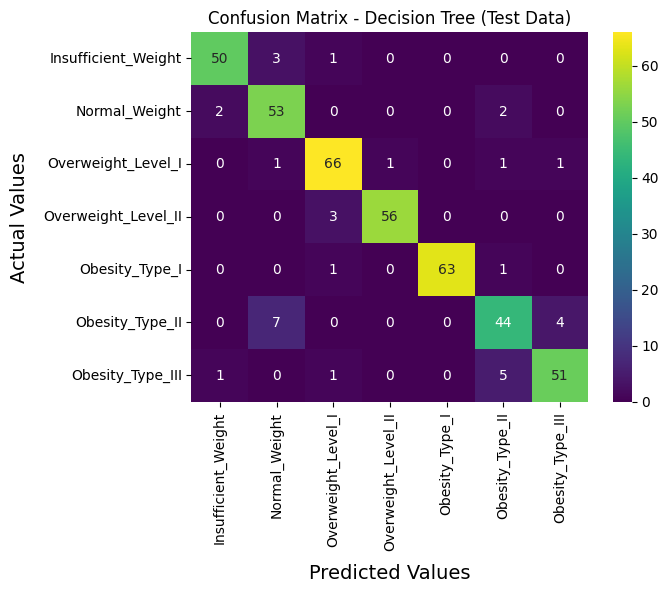

In [519]:
#matriks
labels = ['Insufficient_Weight', 'Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II',
          'Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III']

sns.heatmap(confusion_matrix(y_test, y_pred_dt), annot=True, cmap='viridis', fmt='d',
            xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Values', fontsize=14, labelpad=10)
plt.ylabel('Actual Values', fontsize=14, labelpad=10)
plt.title('Confusion Matrix - Decision Tree (Test Data)')
plt.show()

In [520]:
#random forest
# 1. Import library
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, classification_report

# Pisahkan fitur dan target
X = df.drop('NObeyesdad', axis=1)
y = df['NObeyesdad']

#split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [521]:
#Smote
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

In [522]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_res_scaled, y_train_res)

# STEP 5: Prediksi data testing yang sudah diskalakan
y_pred_rf = rf_model.predict(X_test_scaled)

In [523]:
print("Random Forest Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Precision:", precision_score(y_test, y_pred_rf, average='micro'))
print("Recall:", recall_score(y_test, y_pred_rf, average='micro'))
print("F1-Score:", f1_score(y_test, y_pred_rf, average='micro'))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))

Random Forest Performance:
Accuracy: 0.9258373205741627
Precision: 0.9258373205741627
Recall: 0.9258373205741627
F1-Score: 0.9258373205741627

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.94      0.97        54
           1       0.76      0.95      0.84        57
           2       0.96      0.91      0.93        70
           3       1.00      0.98      0.99        59
           4       1.00      0.98      0.99        65
           5       0.87      0.85      0.86        55
           6       0.92      0.84      0.88        58

    accuracy                           0.93       418
   macro avg       0.93      0.92      0.93       418
weighted avg       0.93      0.93      0.93       418



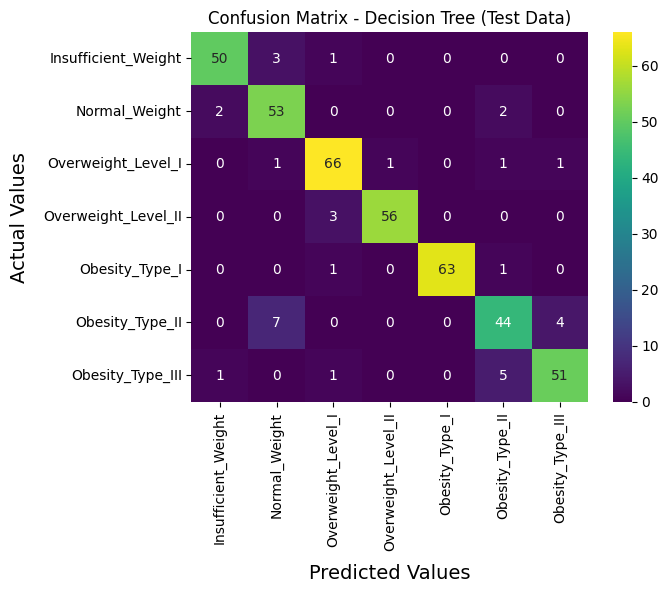

In [524]:
#matriks
labels = ['Insufficient_Weight', 'Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II',
          'Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III']

sns.heatmap(confusion_matrix(y_test, y_pred_dt), annot=True, cmap='viridis', fmt='d',
            xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Values', fontsize=14, labelpad=10)
plt.ylabel('Actual Values', fontsize=14, labelpad=10)
plt.title('Confusion Matrix - Decision Tree (Test Data)')
plt.show()

In [525]:
#STEP 1
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score,precision_score,classification_report, f1_score, confusion_matrix

X = df.drop('NObeyesdad', axis=1)
y = df['NObeyesdad']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [526]:
# STEP 3: SMOTE pada data training
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

In [527]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, recall_score,precision_score,classification_report, confusion_matrix


scaler = StandardScaler()
X_train_res_scaled = scaler.fit_transform(X_train_res)
X_test_scaled = scaler.transform(X_test)

# Inisialisasi model
dt_model = KNeighborsClassifier()
dt_model.fit(X_train_res_scaled, y_train_res)

# STEP 5: Prediksi data testing yang sudah diskalakan
y_pred_dt = dt_model.predict(X_test_scaled)


In [528]:
# Evaluasi
print("K-Nearest Neighbors (KNN):")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Precision:", precision_score(y_test,y_pred_dt, average='micro'))
print('Recall:', recall_score(y_test,y_pred_dt, average='micro'))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_dt))

K-Nearest Neighbors (KNN):
Accuracy: 0.44258373205741625
Precision: 0.44258373205741625
Recall: 0.44258373205741625

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.48      0.59        54
           1       0.37      0.70      0.48        57
           2       0.41      0.50      0.45        70
           3       0.32      0.39      0.35        59
           4       0.86      0.18      0.30        65
           5       0.40      0.42      0.41        55
           6       0.58      0.45      0.50        58

    accuracy                           0.44       418
   macro avg       0.53      0.45      0.44       418
weighted avg       0.53      0.44      0.44       418



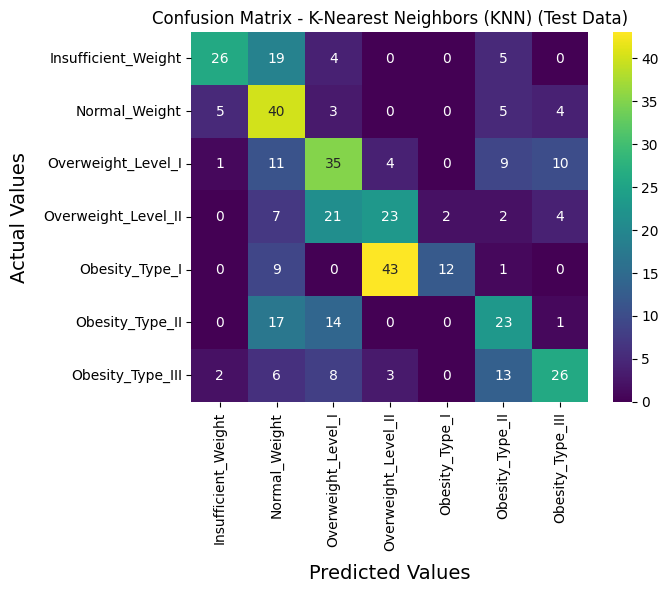

In [529]:
#matriks
labels = ['Insufficient_Weight', 'Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II',
          'Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III']

sns.heatmap(confusion_matrix(y_test, y_pred_dt), annot=True, cmap='viridis', fmt='d',
            xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Values', fontsize=14, labelpad=10)
plt.ylabel('Actual Values', fontsize=14, labelpad=10)
plt.title('Confusion Matrix - K-Nearest Neighbors (KNN) (Test Data)')
plt.show()